In [1]:
%matplotlib inline

In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.metrics  import classification_report, confusion_matrix
from sklearn.preprocessing import  OneHotEncoder, LabelEncoder

In [3]:
mnist = fetch_openml('mnist_784')

In [4]:
inputData, y = mnist["data"], mnist["target"]

In [5]:
print(inputData.shape," and ", type(inputData))

(70000, 784)  and  <class 'numpy.ndarray'>


In [6]:
print(y.shape," and ", type(y))

(70000,)  and  <class 'numpy.ndarray'>


In [7]:
inputData = inputData / 255 #to normilize the data
nDigits   = 10 #output layer perceptron

In [8]:
yOneHot = np.zeros((y.shape[0], nDigits)) #One Hot Encoding size = 70,000 * 10

In [9]:
yOneHot.shape

(70000, 10)

In [10]:
for i in range(y.shape[0]):
    yOneHot[i, int(y[i])] = 1

In [11]:
y = yOneHot  # 70,000 * 10
m = 60000 
m_test = inputData.shape[0] - m # train data 10,000

In [12]:
y_train, y_test = y[:m,:].reshape(m, nDigits), y[m:,:].reshape(m_test, nDigits)

In [13]:
InputData_train, InputData_test = inputData[:m,:], inputData[m:,:]

In [14]:
print(y_train.shape)
print(y_test.shape)
print(InputData_train.shape)
print(InputData_test.shape)

(60000, 10)
(10000, 10)
(60000, 784)
(10000, 784)


In [15]:
np.random.seed(1002)

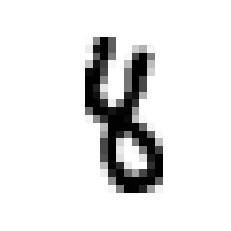

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [16]:
i = 7000
plt.imshow(InputData_train[i,:].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
print(y_train[i,:])

In [17]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_derivative(z):
    return z * (1 - z)
    
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return 0.5 * (np.sign(x) + 1)

def softmax(y):
    return np.exp(y) / np.sum(np.exp(y), axis=0)

def CrossEntropyLoss(y, y_hat):
    L_sum = np.sum(np.multiply(y, np.log(y_hat)))
    m = y.shape[1]
    L = (-1/m) * L_sum
    return L

def CE_Softmax_Derivative(output, ideal_output):
    return output - ideal_output

In [18]:
inputDim      = inputData.shape[1] # 784
nHidden       = 64
learning_rate = 1
weight_deacy  = 0.001

In [19]:
W1 = 0.01*np.random.randn(nHidden, inputDim) #  64 * 784
b1 = np.zeros((nHidden, 1)) #  64
W2 = 0.01*np.random.randn(nDigits, nHidden) # 10 * 64
b2 = np.zeros((nDigits, 1)) #  10

inputData = InputData_train
y = y_train

In [20]:
print(W1.shape)
print(W2.shape)
print(b1.shape)
print(b2.shape)

(64, 784)
(10, 64)
(64, 1)
(10, 1)


In [23]:
nEpochs = 100
costPlot = np.zeros(nEpochs)

for i in range(nEpochs):
    # feed forward start
    print(W1.shape, inputData.shape, inputData.T.shape) # 64 * 784, 60,000 * 784, 784 * 60,000
    Z1 = np.matmul(W1,inputData.T) + b1
    print("Z1 shape ", Z1.shape)  # 64 * 60,000
    A1 = relu(Z1)                 # 64 * 60,000
    print("A1 shape ", A1.shape)  # 64 * 60,000 
    Z2 = np.matmul(W2,A1) + b2    # 10 * 64 , 64 * 60,000
    print("Z2 shape ", Z2.shape)  # 10 * 60,000
    A2 = softmax(Z2)              # 10 * 60,000
    print("A2 Shape ", A2.shape)  # 10 * 60,000
    cost = CrossEntropyLoss(y.T, A2) 
    print(cost, "shape", cost.shape, "size", cost.size)
    costPlot[i] = cost
    # feed forward done
    
    # backpropagation start
    dZ2 = CE_Softmax_Derivative(A2.T,y)
    print("dZ2 shape ", dZ2.shape) # 60,000 * 10
    dW2 = (1./m) * np.matmul(dZ2, A1.T) # 60,000 * 10 , 60,000 * 64
    print("dw2 shape", dW2.shape)
    break;

(64, 784) (60000, 784) (784, 60000)
Z1 shape  (64, 60000)
A1 shape  (64, 60000)
Z2 shape  (10, 60000)
A2 Shape  (10, 60000)
2.3025926683067466 shape () size 1
dZ2 shape  (60000, 10)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 60000 is different from 10)